# Exploratory Data Analysis of Similarity Data

In [144]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random, itertools as it
import pandas as pd
import numpy as np

## Similarity Distribution Over Varying Graph Sizes

In [157]:
dist_1 = pd.read_csv("Experiment - Graph Size Distribution/Data/graph-size-dist-10-10-41-10.csv", header=[0, 1], index_col=[0,1])
dist_2 = pd.read_csv("Experiment - Graph Size Distribution/Data/graph-size-dist-20-70-101-10.csv", header=[0, 1], index_col=[0,1])
dist_2.head()

Edit-Distance Immediate Similarity  \
                                                                         mean   
Number of Nodes Per Graph Number of Graphs                                      
70                        20                                         0.742649   
80                        20                                         0.736727   
90                        20                                         0.756333   
100                       20                                         0.743665   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        20                0.739094  0.038422   
80                        20                0.735073  0.040025   
90                        20                0.752896  0.031234   
100                       20                0.747975  0.032720   

                                           Edit-Distance Full Similarity  \
                                                                    mean   
Number of Nodes Per Graph Number of Graphs                                 
70                        20                                    0.489028   
80                        20                                    0.496276   
90                        20                                    0.476306   
100                       20                                    0.490869   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        20                0.500373  0.043714   
80                        20                0.494886  0.048352   
90                        20                0.468392  0.060997   
100                       20                0.493758  0.044309   

                                           Jaccard Index Similarity            \
                                                               mean       50%   
Number of Nodes Per Graph Number of Graphs                                      
70                        20                               0.112857  0.111035   
80                        20                               0.115814  0.110472   
90                        20                               0.116903  0.113056   
100                       20                               0.108529  0.111990   

                                                      \
                                                 std   
Number of Nodes Per Graph Number of Graphs             
70                        20                0.038018   
80                        20                0.048945   
90                        20                0.049375   
100                       20                0.028348   

                                           Longest Maximum Independent Set  \
                                                                      mean   
Number of Nodes Per Graph Number of Graphs                                   
70                        20                                         43.35   
80                        20                                         49.75   
90                        20                                         54.90   
100                       20                                         62.25   

                                                            \
                                             50%       std   
Number of Nodes Per Graph Number of Graphs                   
70                        20                43.0  2.539685   
80                        20                50.5  3.176807   
90                        20                55.0  2.770142   
100                       20                63.0  3.006572   

                                           Number of Maximum Cliques  \
 

In [158]:
# Hard-coded because this is temporary
# (It took a long time to compile the second data file, so I have not
#  done it again with the proper similarity scaling, which is why I am scaling it here).
index_1_list = [value_pair[0] for value_pair in dist_2.index.values.tolist()]

for i in index_1_list:
    row = dist_2.loc[i]
    row.loc[20]["Edit-Distance Immediate Similarity","mean"] = 1 - row.loc[20]["Edit-Distance Immediate Similarity","mean"]

dist_2

Edit-Distance Immediate Similarity  \
                                                                         mean   
Number of Nodes Per Graph Number of Graphs                                      
70                        20                                         0.257351   
80                        20                                         0.263273   
90                        20                                         0.243667   
100                       20                                         0.256335   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        20                0.739094  0.038422   
80                        20                0.735073  0.040025   
90                        20                0.752896  0.031234   
100                       20                0.747975  0.032720   

                                           Edit-Distance Full Similarity  \
                                                                    mean   
Number of Nodes Per Graph Number of Graphs                                 
70                        20                                    0.489028   
80                        20                                    0.496276   
90                        20                                    0.476306   
100                       20                                    0.490869   

                                                                \
                                                 50%       std   
Number of Nodes Per Graph Number of Graphs                       
70                        20                0.500373  0.043714   
80                        20                0.494886  0.048352   
90                        20                0.468392  0.060997   
100                       20                0.493758  0.044309   

                                           Jaccard Index Similarity            \
                                                               mean       50%   
Number of Nodes Per Graph Number of Graphs                                      
70                        20                               0.112857  0.111035   
80                        20                               0.115814  0.110472   
90                        20                               0.116903  0.113056   
100                       20                               0.108529  0.111990   

                                                      \
                                                 std   
Number of Nodes Per Graph Number of Graphs             
70                        20                0.038018   
80                        20                0.048945   
90                        20                0.049375   
100                       20                0.028348   

                                           Longest Maximum Independent Set  \
                                                                      mean   
Number of Nodes Per Graph Number of Graphs                                   
70                        20                                         43.35   
80                        20                                         49.75   
90                        20                                         54.90   
100                       20                                         62.25   

                                                            \
                                             50%       std   
Number of Nodes Per Graph Number of Graphs                   
70                        20                43.0  2.539685   
80                        20                50.5  3.176807   
90                        20                55.0  2.770142   
100                       20                63.0  3.006572   

                                           Number of Maximum Cliques  \
 

In [159]:
distributions = [dist_1, dist_2]

dist = pd.concat(distributions)

In [160]:
dist["Edit-Distance Immediate Similarity"]["mean"]

Number of Nodes Per Graph  Number of Graphs
10                         10                  0.553238
20                         10                  0.596516
30                         10                  0.597604
40                         10                  0.619362
70                         20                  0.257351
80                         20                  0.263273
90                         20                  0.243667
100                        20                  0.256335
Name: mean, dtype: float64

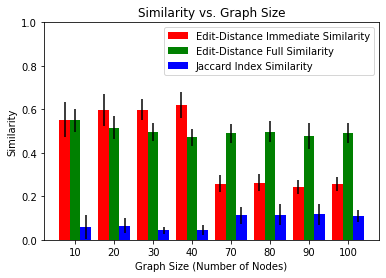

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)

ed_imm_sim = list(dist["Edit-Distance Immediate Similarity"]["mean"])
ed_f_sim = list(dist["Edit-Distance Full Similarity"]["mean"])
ji_sim = list(dist["Jaccard Index Similarity"]["mean"])

ed_imm_sim_std = list(dist["Edit-Distance Immediate Similarity"]["std"])
ed_f_sim_std = list(dist["Edit-Distance Full Similarity"]["std"])
ji_sim_std = list(dist["Jaccard Index Similarity"]["std"])

# Adapted from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
N = len(ed_imm_sim)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
index_1_list = [value_pair[0] for value_pair in dist.index.values.tolist()]

# ed_imm_sim = dist["Edit-Distance Immediate Similarity"]["mean"]
# ed_f_sim = dist["Edit-Distance Full Similarity"]["mean"]
# ji_sim = dist["Jaccard Index Similarity"]["mean"]

# ed_imm_sim_std = dist["Edit-Distance Immediate Similarity"]["std"]
# ed_f_sim_std = dist["Edit-Distance Full Similarity"]["std"]
# ji_sim_std = dist["Jaccard Index Similarity"]["std"]

# print(ji_sim_std.shape == ji_sim.shape)
# print(len(ed_imm_sim) == len(ji_sim_std))

rects1 = ax.bar(ind, ed_imm_sim, width, color='r', yerr=ed_imm_sim_std)
rects2 = ax.bar(ind + width, ed_f_sim, width, color='g', yerr=ed_f_sim_std)
rects3 = ax.bar(ind + width * 2, ji_sim, width, color='b', yerr=ji_sim_std)

ax.set_ylabel('Similarity')
ax.set_xlabel("Graph Size (Number of Nodes)")
ax.set_xticks(ind + width)
ax.set_xticklabels(index_1_list)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Edit-Distance Immediate Similarity', 'Edit-Distance Full Similarity', 'Jaccard Index Similarity'))
ax.set_ylim(0, 1)
ax.set_title("Similarity vs. Graph Size")

plt.show()

#### Other Work

In [162]:
graph_size_dist = pd.read_csv("Data/graph-size-distrubtion-5-10-41-10.csv")

FileNotFoundError: [Errno 2] File Data/graph-size-distrubtion-5-10-41-10.csv does not exist: 'Data/graph-size-distrubtion-5-10-41-10.csv'

In [163]:
graph_size_dist.head()

NameError: name 'graph_size_dist' is not defined

In [ ]:
plt.scatter(graph_size_dist["Nodes"], 1 - graph_size_dist["Edit-Distance Immediate Similarity"], label = "Edit-Distance Immediate Similarity")
plt.scatter(graph_size_dist["Nodes"], 1 - graph_size_dist["Edit-Distance Full Similarity"], label = "Edit-Distance Full Similarity")
plt.scatter(graph_size_dist["Nodes"], graph_size_dist["Jaccard Index Similarity (Method 1)"], label = "Jaccard Index Similarity (Method 1)")

plt.xlabel('Size of Graph (Number of Nodes)')
plt.ylabel('Similarity')
plt.title('Similarity vs. Size of Graph')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)
plt.ylim(0, 1)

plt.show()

In [ ]:
plt.plot(graph_size_dist["Nodes"], graph_size_dist["Longest Maximum Independent Set"], label = "Longest Maximum Independent Set")

plt.xlabel('Size of Graph (Number of Nodes)')
plt.ylabel('Longest Maximum Independent Set')
plt.title('Longest Maximum Independent Set vs. Size of Graph')
plt.legend()

plt.show()

In [ ]:
plt.plot(graph_size_dist["Nodes"], graph_size_dist["Number of Maximum Cliques"], label = "Number of Maximum Cliques")

plt.xlabel('Size of Graph (Number of Nodes)')
plt.ylabel('Number of Maximum Cliques')
plt.title('Number of Maximum Cliques vs. Size of Graph')
plt.legend()

plt.show()

In [ ]:
plt.plot(graph_size_dist["Nodes"], graph_size_dist["Longest Maximum Clique"], label = "Longest Maximum Clique")

plt.xlabel('Size of Graph (Number of Nodes)')
plt.ylabel('Longest Maximum Clique')
plt.title('Longest Maximum Clique vs. Size of Graph')
plt.legend()

plt.show()

In [ ]:
plt.plot(graph_size_dist["Longest Maximum Independent Set"], graph_size_dist["Edit-Distance Full Similarity"], label = "Edit-Distance Full Similarity")

plt.xlabel('Longest Maximum Independent Set')
plt.ylabel('Edit-Distance Full Similarity')
plt.title('Edit-Distance Full Similarity vs. Longest Maximum Independent Set')
plt.legend()
plt.ylim(0, 1)

plt.show()

In [ ]:
plt.plot(graph_size_dist["Longest Maximum Independent Set"], graph_size_dist["Jaccard Index Similarity (Method 1)"], label = "Jaccard Index Similarity (Method 1)")

plt.xlabel('Longest Maximum Independent Set')
plt.ylabel('Jaccard Index Similarity (Method 1)')
plt.title('Jaccard Index Similarity (Method 1) vs. Longest Maximum Independent Set')
plt.legend()
plt.ylim(0, 1)

plt.show()

### Distribution of Similarity Over Random Graphs of Constant Size

In [26]:
dist_1 = pd.read_csv("Experiment - Similarity Distribution/Data/sim-dist-3-5-7.csv", index_col="Graph Number")
dist_1.head()

ValueError: Index Graph Number invalid

In [ ]:
sim_dist.head()

In [ ]:
sim_dist["Edit-Distance Immediate Similarity"] = 1 - sim_dist["Edit-Distance Immediate Similarity"]
sim_dist["Edit-Distance Full Similarity"] = 1 - sim_dist["Edit-Distance Full Similarity"]

In [ ]:
sim_dist.boxplot(column=["Edit-Distance Immediate Similarity", "Edit-Distance Full Similarity", 'Jaccard Index Similarity (Method 1)'], figsize = (15,6), return_type = "axes")

plt.ylabel("Similarity")
plt.xlabel("(Using Randomly Generated Directed Graphical Models with 30 nodes and 45 edges)")
plt.title("Similarity of Randomly Generated Directed Graphical Models")
plt.ylim(0, 1)